# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
city_ride_count = pyber_data_df.groupby("type")["ride_id"].count()

In [4]:
# 2. Get the total drivers for each city type
city_total_driver = city_data_df.groupby("type")["driver_count"].sum()

In [5]:
#  3. Get the total amount of fares for each city type
city_total_fare = pyber_data_df.groupby("type")["fare"].sum()

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_city_fare = city_total_fare / city_ride_count

In [7]:
# 5. Get the average fare per driver for each city type. 
avg_driver_fare = city_total_fare / city_total_driver


In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary = {
    "Total Rides" : city_ride_count,
    "Total Drivers" : city_total_driver,
    "Total Fares" : city_total_fare,
    "Average Fare per Ride" : avg_city_fare,
    "Average Fare per Driver" : avg_driver_fare
}

pyber_summary_df = pd.DataFrame(pyber_summary)
print(pyber_summary_df)

          Total Rides  Total Drivers  Total Fares  Average Fare per Ride  \
type                                                                       
Rural             125             78      4327.93              34.623440   
Suburban          625            490     19356.33              30.970128   
Urban            1625           2405     39854.38              24.525772   

          Average Fare per Driver  
type                               
Rural                   55.486282  
Suburban                39.502714  
Urban                   16.571468  


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.
# df_summary_df['Total Fares'] = pd.to_numeric(df['Total Fares'])
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame

pyber_data_df['date'] = pd.to_datetime(pyber_data_df['date'])
pyber_data_df['date'] = pyber_data_df['date'].dt.date
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06,34.58,3908451377344,46,Urban


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
#must use double brackets on the column, otherwise a series is returned
fare_date_type_df = pyber_data_df.groupby(["type","date"])[["fare"]].sum()

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
fare_date_type_df = fare_date_type_df.reset_index()
fare_date_type_df


,type,date,fare
0,Rural,2019-01-01,43.69
1,Rural,2019-01-02,52.12
2,Rural,2019-01-03,19.90
3,Rural,2019-01-04,24.88
4,Rural,2019-01-06,47.33
...,...,...,...
329,Urban,2019-05-04,323.57
330,Urban,2019-05-05,322.10
331,Urban,2019-05-06,181.20
332,Urban,2019-05-07,258.01


In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date.
fare_date_type_pivot_df = fare_date_type_df.pivot(index="date",columns="type",values="fare")
fare_date_type_pivot_df

type,Rural,Suburban,Urban
date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
...,...,...,...
2019-05-04,NaN,91.71,323.57
2019-05-05,26.53,154.78,322.10
2019-05-06,111.88,34.12,181.20


In [25]:
# # 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
import datetime as dt
# start_date = '2019-01-01'
# end_date = '2019-04-29'
# q1_2019_df = fare_date_type_pivot_df.query('date >= @start_date and date <= @end_date')
# fare_date_type_df.pivot(index="date",columns="type",values="fare")



# # # rng = pd.date_range(date(2019,1,1), date(2019,4,29))
start_date = dt.date(2019,1,1)
end_date = dt.date(2019,4,28)
# mask = (fare_date_type_df['date'] > start_date) & (fare_date_type_df['date'] <= end_date)
q1_2019_df = fare_date_type_pivot_df.loc[start_date:end_date]
print(q1_2019_df.tail(10))

type        Rural  Suburban   Urban
date                               
2019-04-19  16.29    352.14  367.45
2019-04-20    NaN    268.50  217.90
2019-04-21  18.54     29.93  192.44
2019-04-22  57.73    170.16  339.07
2019-04-23  25.94    221.48  139.71
2019-04-24    NaN    220.72  312.64
2019-04-25  55.84    155.98  419.81
2019-04-26    NaN    132.45  330.98
2019-04-27  52.34    268.25  367.30
2019-04-28    NaN    188.71  328.78


In [26]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
q1_2019_df.index = pd.to_datetime(q1_2019_df.index)
q1_2019_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89


In [27]:
# 7. Check that the datatype for the index is datetime using df.info()
q1_2019_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118 entries, 2019-01-01 to 2019-04-28
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     73 non-null     float64
 1   Suburban  117 non-null    float64
 2   Urban     118 non-null    float64
dtypes: float64(3)
memory usage: 3.7 KB


In [29]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
q1_2019_resampled_df = q1_2019_df.resample("W").sum()
print(q1_2019_resampled_df)

type         Rural  Suburban    Urban
date                                 
2019-01-06  187.92    721.60  1661.68
2019-01-13   67.65   1105.13  2050.43
2019-01-20  306.00   1218.20  1939.02
2019-01-27  179.69   1203.28  2129.51
2019-02-03  333.08   1042.79  2086.94
2019-02-10  115.80    974.34  2162.64
2019-02-17   95.82   1045.50  2235.07
2019-02-24  419.06   1412.74  2466.29
2019-03-03  175.14    858.46  2218.20
2019-03-10  303.94    925.27  2470.93
2019-03-17  163.39    906.20  2044.42
2019-03-24  189.76   1122.20  2368.37
2019-03-31  199.42   1045.06  1942.77
2019-04-07  501.24   1010.73  2356.70
2019-04-14  269.79    784.82  2390.72
2019-04-21  214.14   1149.27  2303.80
2019-04-28  191.85   1357.75  2238.29


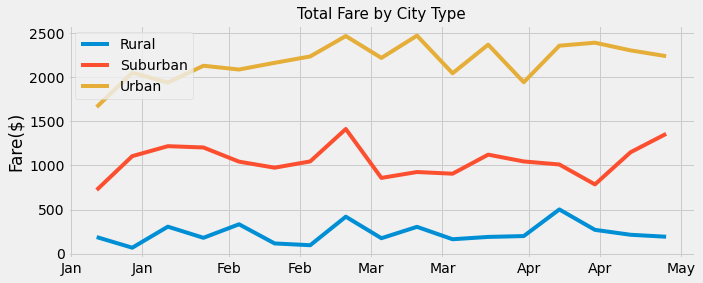

In [64]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
from matplotlib import pyplot as plt, dates as mdates
from matplotlib.dates import DateFormatter
# Use the graph style fivethirtyeight.
fig, ax = plt.subplots(figsize=(10, 4))

# plt.figure(figsize=(10,4))

style.use('fivethirtyeight')
plt.plot(q1_2019_resampled_df.index, q1_2019_resampled_df['Rural'], label = "Rural")
plt.plot(q1_2019_resampled_df.index, q1_2019_resampled_df['Suburban'], label = "Suburban")
plt.plot(q1_2019_resampled_df.index, q1_2019_resampled_df['Urban'], label = "Urban")
par = {'axes.titlesize':15}
plt.rcParams.update(par)

plt.ylabel("Fare($)")
plt.title("Total Fare by City Type")

# monthsFmt = mdates.DateFormatter('%B')
# ax.xaxis.set_major_locator(monthsFmt)



date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)

plt.legend()
plt.show()
